# Discussion 6

## Regular Expressions

To use regular expressions in Python we need to import the re library using: import re.

__Comments__:
Python's built-in string methods, like .split(), don't use regular expressions. Pandas' string methods, like .str.split(), do use regular expressions (some of them, at least). So if you want to use regular expressions, you can either put your strings in a Pandas series or data frame, or else use Python's built-in re module.

In [ ]:
.str.split('[,. ]')  # regex

In [174]:
import re

In [175]:
re.findall(".", "xyz") # any one character

['x', 'y', 'z']

In [176]:
re.findall("[abc]", "caxyb") # any one in the list

['c', 'a', 'b']

In [177]:
re.findall("[^12]", "31214")  # anything except 1 and 2

['3', '4']

In [276]:
re.findall("[d-z0-9]", "0123abcdefGHi")  # ranges of letters or numbers

['0', '1', '2', '3', 'd', 'e', 'f', 'i']

In [179]:
re.findall("[a-z-]", "-") # to include a literal dash - in a set, don't put it between letters

['-']

In [183]:
re.findall("^ab", "abc") # start of a string

['ab']

In [184]:
re.findall("bc$", "abc") # end of a string

['bc']

In [224]:
re.findall("aa+", "a aa aaa aaab") # repeat previous character 1 or more times

['aa', 'aaa', 'aaa']

In [225]:
re.findall("aa*", "a aa aaa aaab") # repeat previous character 0 or more times

['a', 'aa', 'aaa', 'aaa']

In [278]:
re.findall("xyz?", "xy xz xyz asdefg") # repeat previous character 0 or 1 times

['xy', 'xyz']

In [257]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [258]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

Here, re.findall() just gave us the suffix even though the regular expression matched the entire word. If we want to use the parentheses to specify the scope of the disjunction, but not to select the material to be output, we have to add ?:

In [259]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

The backslash \ has a special meaning in Python strings: it marks the beginning of an escape sequence.

In [196]:
print("\\")

\


In [203]:
re.findall("\.", "x.y")

['.']

In [206]:
re.findall("\\\\", 'x\y')

['\\']

Python provides raw strings to fix this problem. In a raw string, backslash has no special meaning for Python (but it still has a special meaning for regex).

In [205]:
re.findall(r"\\", 'x\y')

['\\']

In [284]:
re.findall(r"\.", "x.y")

['.']

In [269]:
re.findall("\s+", "x y  z")

[' ', '  ']

In [286]:
re.findall("\w", "x y,z.a b 0,1/3")

['x', 'y', 'z', 'a', 'b', '0', '1', '3']

In [273]:
re.split("\W", "a,b.c'd|e f")

['a', 'b', 'c', 'd', 'e', 'f']

## NLP- Analyzing Text with the Natural Language Toolkit (NLTK)

In [292]:
import numpy as np
import pandas as pd

In [293]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [11]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [75]:
[x for x in text1]  # a list of words

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 '-',
 'fish',
 'is',
 'to',
 'be',
 

## Initiate a text file

In [171]:
nltk.word_tokenize('This is the 6th discussion!')

['This', 'is', 'the', '6th', 'discussion', '!']

In [274]:
nltk.text.Text('This is the 6th discussion!')

<Text: T h i s   i s  ...>

In [76]:
nltk.text.Text(['This','is','the','6th','discussion','!'])

<Text: This is the 6th discussion !...>

In [280]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [287]:
nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

'[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.  He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.  He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.\r\n\r\n"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true." --HACKLUYT\r\n\r\n"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\r\nor rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\r\nA.S. WALW-IAN, t

In [71]:
# from the Project Gutenberg electronic text archive
nltk.corpus.gutenberg.words('melville-moby_dick.txt')

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [72]:
nltk.text.Text( nltk.corpus.gutenberg.words('melville-moby_dick.txt') )

<Text: Moby Dick by Herman Melville 1851>

In [98]:
corpus_root = '/Users/wangxiaodong/Downloads'
wordlists = nltk.corpus.PlaintextCorpusReader(corpus_root, '[a-z]*\.txt$')
wordlists.fileids()

['boston.txt', 'filling.txt', 'key.txt', 'sunspots.txt', 'wls.txt']

In [97]:
wordlists.raw('boston.txt')

'CRIM NOX AGE DIS PTRATIO MEDV\n1__Nahant 0.00632 0.538 65.2 4.09 15.3 24\n2__Swampscott 0.02731 0.469 78.9 4.9671 17.8 21.6\n3__Swampscott 0.02729 0.469 61.1 4.9671 17.8 34.7\n4__Marblehead 0.03237 0.458 45.8 6.0622 18.7 33.4\n5__Marblehead 0.06905 0.458 54.2 6.0622 18.7 36.2\n6__Marblehead 0.02985 0.458 58.7 6.0622 18.7 28.7\n7__Salem 0.08829 0.524 66.6 5.5605 15.2 22.9\n8__Salem 0.14455 0.524 96.1 5.9505 15.2 27.1\n9__Salem 0.21124 0.524 100 6.0821 15.2 16.5\n10__Salem 0.17004 0.524 85.9 6.5921 15.2 18.9\n11__Salem 0.22489 0.524 94.3 6.3467 15.2 15\n12__Salem 0.11747 0.524 82.9 6.2267 15.2 18.9\n13__Salem 0.09378 0.524 39 5.4509 15.2 21.7\n14__Lynn 0.62976 0.538 61.8 4.7075 21 20.4\n15__Lynn 0.63796 0.538 84.5 4.4619 21 18.2\n16__Lynn 0.62739 0.538 56.5 4.4986 21 19.9\n17__Lynn 1.05393 0.538 29.3 4.4986 21 23.1\n18__Lynn 0.7842 0.538 81.7 4.2579 21 17.5\n19__Lynn 0.80271 0.538 36.6 3.7965 21 20.2\n20__Lynn 0.7258 0.538 69.5 3.7965 21 18.2\n21__Lynn 1.25179 0.538 98.1 3.7979 21 13.6\

In [95]:
wordlists.words('boston.txt')

['CRIM', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'MEDV', ...]

In [96]:
wordlists.sents('boston.txt')

[['CRIM', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'MEDV', '1__Nahant', '0', '.', '00632', '0', '.', '538', '65', '.', '2', '4', '.', '09', '15', '.', '3', '24', '2__Swampscott', '0', '.', '02731', '0', '.', '469', '78', '.', '9', '4', '.', '9671', '17', '.', '8', '21', '.', '6', '3__Swampscott', '0', '.', '02729', '0', '.', '469', '61', '.', '1', '4', '.', '9671', '17', '.', '8', '34', '.', '7', '4__Marblehead', '0', '.', '03237', '0', '.', '458', '45', '.', '8', '6', '.', '0622', '18', '.', '7', '33', '.', '4', '5__Marblehead', '0', '.', '06905', '0', '.', '458', '54', '.', '2', '6', '.', '0622', '18', '.', '7', '36', '.', '2', '6__Marblehead', '0', '.', '02985', '0', '.', '458', '58', '.', '7', '6', '.', '0622', '18', '.', '7', '28', '.', '7', '7__Salem', '0', '.', '08829', '0', '.', '524', '66', '.', '6', '5', '.', '5605', '15', '.', '2', '22', '.', '9', '8__Salem', '0', '.', '14455', '0', '.', '524', '96', '.', '1', '5', '.', '9505', '15', '.', '2', '27', '.', '1', '9__Salem', '0', '.', '2

## Operations for text

In [283]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [25]:
len(text1)      # total words

260819

In [27]:
len(set(text1))  # unique words

19317

A concordance view shows us every occurrence of a given word, together with some context. 

In [17]:
text1.concordance("much")

Displaying 25 of 223 matches:
Give it up , Sub - Subs ! For by how much the more pains ye take to please the
 ye take to please the world , by so much the more shall ye for ever go thankl
rlpooles called Balaene , take up as much in length as four acres or arpens of
of nights -- do not enjoy themselves much , as a general thing ;-- no , I neve
ery kind whatsoever . It is quite as much as I can do to take care of myself ,
y else is one way or other served in much the same way -- either in a physical
 breathes it first ; but not so . In much the same way do the commonalty lead 
t was a Saturday night in December . Much was I disappointed upon learning tha
his matter poor old Nantucket is now much behind her , yet Nantucket was her g
ate chaos bewitched . But by dint of much and earnest contemplation , and oft 
der full sail , but he didn ' t make much headway , I thought . At last some f
he whole he refrained from making as much noise as the rest . This man interes
cences that did not se

The term common_contexts allows us to examine just the contexts that are shared by two or more words

In [16]:
text1.common_contexts(["much", "more"])

looked_like is_to is_in looks_like


we can determine the location of a word in the text: how many words from the beginning it appears. 

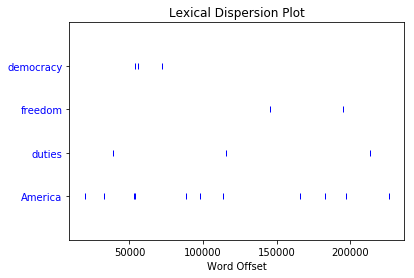

In [24]:
text1.dispersion_plot(["democracy", "freedom", "duties", "America"])


Frequency distribution can tell us the frequency of each vocabulary item in the text.

In [29]:
fd=FreqDist(text1)
fd

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [31]:
fd.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

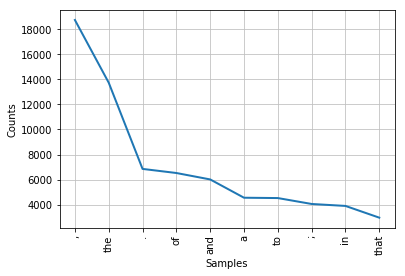

In [35]:
fd.plot(10)

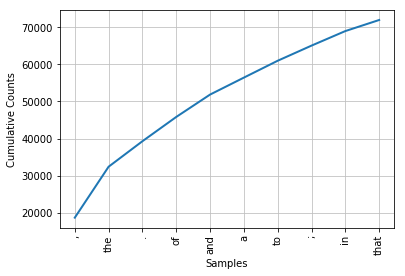

In [37]:
fd.plot(10,cumulative=True)

In [41]:
# select unique words with length greater than 10 and freq greater than 20
[w for w in set(text1) if len(w) > 10 and fd[w] > 20]

['considering',
 'considerable',
 'Nantucketer',
 'circumstances',
 'harpooneers',
 'Nevertheless',
 'nevertheless',
 'circumstance']

In [47]:
# frequent distribution of word lengths in a text
fd2=FreqDist([len(w) for w in text1])
fd2

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [48]:
fd2[3]

50223

In [49]:
fd2.max()

3

In [57]:
[w for w in set(text1) if w.endswith('ness') & w.istitle()]

['Madness',
 'Witness',
 'Unfitness',
 'Business',
 'Darkness',
 'Loveliness',
 'Whiteness',
 'Righteousness']

In [62]:
FreqDist([ w for w in text1 if w.isalpha()]).most_common(10)

[('the', 13721),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 ('in', 3916),
 ('that', 2982),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124)]

### regrex

In [236]:
[w for w in set(text1) if re.findall('^S.*ed$',w)] 

['Startled',
 'Shrouded',
 'Steed',
 'Soothed',
 'Shipped',
 'Supplied',
 'Smuggled',
 'Stretched',
 'Seed',
 'Seated',
 'Suspended',
 'Started',
 'Screwed',
 'Stripped']

In [239]:
[w for w in set(text1) if re.findall('^[fgh].[st]$',w)]

['got', 'fat', 'get', 'hot', 'hit', 'his', 'has', 'hat', 'gas', 'fit']

In [251]:
[w for w in set(text1) if re.findall('^T.*(ed|ing)$',w)]

['Threading',
 'Thrusted',
 'Throwing',
 'Taking',
 'Thundering',
 'Tempered',
 'Tying',
 'Touching',
 'Tied',
 'Transported',
 'Thrusting',
 'Tusked',
 'Turning',
 'Tumbled',
 'Thinking',
 'Throttling']

In [249]:
# {m,n} at least m and no more than n repeats
[w for w in set(text1) if re.findall('^[0-9]+[a-z]{1,5}$',w)]  #[a-z]+  [a-z]*

['31st', '1st', '200th', '15th', '16th', '3d', '21st', '275th']

In [256]:
# {m,} at least m repeats
[w for w in set(text1) if re.findall('^[asdf]{3,}$',w)]

['dad', 'add', 'sad', 'ass', 'adds']

### Collocation and Bigrams

A collocation is a sequence of words that occur together unusually often. For example, "United States" is a collection.

In [45]:
# extract a list of word pairs- bigrams
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

collocations() can find bigrams that occur more often than we would expect based on the frequency of the individual words.

In [42]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [115]:
[(target,w) 
for w in text1
for target in ['ed', 'ing'] 
if w.lower().endswith(target)]

[('ed', 'Supplied'),
 ('ing', 'dusting'),
 ('ed', 'embellished'),
 ('ed', 'loved'),
 ('ed', 'reminded'),
 ('ed', 'called'),
 ('ing', 'leaving'),
 ('ed', 'named'),
 ('ing', 'rolling'),
 ('ed', 'arched'),
 ('ed', 'vaulted'),
 ('ed', 'Supplied'),
 ('ing', 'painstaking'),
 ('ing', 'picking'),
 ('ed', 'sacred'),
 ('ing', 'touching'),
 ('ing', 'appearing'),
 ('ing', 'entertaining'),
 ('ing', 'affording'),
 ('ing', 'glancing'),
 ('ed', 'fancied'),
 ('ing', 'including'),
 ('ing', 'clearing'),
 ('ed', 'storied'),
 ('ing', 'making'),
 ('ed', 'pampered'),
 ('ing', 'coming'),
 ('ed', 'splintered'),
 ('ed', 'created'),
 ('ed', 'prepared'),
 ('ing', 'piercing'),
 ('ed', 'crooked'),
 ('ing', 'thing'),
 ('ed', 'called'),
 ('ed', 'proceeded'),
 ('ed', 'appeared'),
 ('ed', 'mouthed'),
 ('ing', 'raising'),
 ('ing', 'beating'),
 ('ed', 'visited'),
 ('ing', 'catching'),
 ('ing', 'king'),
 ('ed', 'catched'),
 ('ed', 'killed'),
 ('ing', 'KING'),
 ('ed', 'ALFRED'),
 ('ed', 'swallowed'),
 ('ed', 'described'),


In [117]:
cfd=nltk.ConditionalFreqDist([(target,w) 
for w in text1
for target in ['ed', 'ing'] 
if w.lower().endswith(target)])
cfd

<ConditionalFreqDist with 2 conditions>

In [119]:
cfd.conditions()

['ed', 'ing']

In [122]:
cfd['ed'].most_common(5)

[('seemed', 283), ('cried', 155), ('called', 116), ('indeed', 82), ('bed', 76)]

In [123]:
cfd['ing'].most_common(5)

[('being', 219),
 ('thing', 188),
 ('something', 119),
 ('whaling', 116),
 ('nothing', 102)]

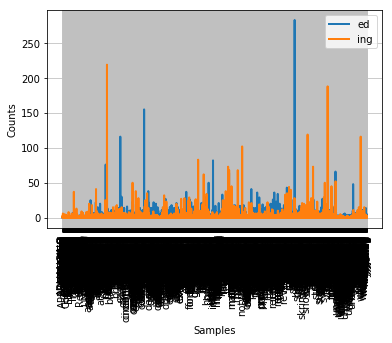

In [151]:
cfd.plot()   # alert: it's very time comsuming

In [125]:
cfd2=nltk.ConditionalFreqDist(bigrams(text1))
cfd2

<ConditionalFreqDist with 19317 conditions>

In [127]:
cfd2['This']

FreqDist({'is': 15, 'done': 8, 'was': 6, 'whale': 5, 'man': 3, 'peculiarity': 3, 'fin': 2, 'whole': 2, 'arrangement': 2, 'particular': 2, ...})

In [281]:
cfd2['is']

FreqDist({'the': 138, 'a': 115, ',': 97, 'not': 67, 'it': 48, 'to': 40, 'this': 36, 'that': 33, 'no': 30, 'in': 29, ...})

In [282]:
cfd2['the']

FreqDist({'whale': 369, 'ship': 235, 'sea': 223, 'same': 159, 'Pequod': 147, 'other': 135, 'boat': 118, 'most': 110, 'first': 106, 'great': 102, ...})

In [134]:
def generate_model(cfd2, word, num=15):
    result=[]
    for i in range(num):
        result.append(word)
        word = cfd2[word].max()
    return result

In [135]:
generate_model(cfd2,'This')

['This',
 'is',
 'the',
 'whale',
 ',',
 'and',
 'the',
 'whale',
 ',',
 'and',
 'the',
 'whale',
 ',',
 'and',
 'the']

In [289]:
generate_model(cfd2,'We')

['We',
 'must',
 'be',
 'the',
 'whale',
 ',',
 'and',
 'the',
 'whale',
 ',',
 'and',
 'the',
 'whale',
 ',',
 'and']

## Useful Wordlists

In [290]:
# find unusual or mis-spelt words in a text 
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words() )
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [291]:
nltk.corpus.words.words()

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [141]:
unusual_words(text1)

['abated',
 'abating',
 'abednego',
 'abhorred',
 'abided',
 'abjectus',
 'ablutions',
 'abominated',
 'aboriginalness',
 'abortions',
 'abounded',
 'abstained',
 'accelerating',
 'accidents',
 'accommodated',
 'accompanied',
 'accompanies',
 'accompaniments',
 'accompanying',
 'accomplishing',
 'accountants',
 'accounted',
 'accounts',
 'accumulated',
 'accumulating',
 'acerbities',
 'ached',
 'achieved',
 'achilles',
 'acknowledges',
 'acknowledging',
 'acquaintances',
 'acquiesced',
 'acres',
 'acted',
 'actest',
 'actions',
 'actuated',
 'acushnet',
 'adapted',
 'adding',
 'addressed',
 'addressing',
 'adds',
 'adhering',
 'adios',
 'adjusting',
 'admeasurements',
 'administered',
 'administering',
 'admirals',
 'admirers',
 'admits',
 'admitting',
 'admonished',
 'admonishing',
 'admonitions',
 'adopting',
 'adoring',
 'adorned',
 'adorning',
 'advances',
 'advantages',
 'adventures',
 'advertised',
 'aerated',
 'affairs',
 'affghanistan',
 'affinities',
 'affirms',
 'affixed',
 '

high-frequency words like 'the', 'to' 'and' 'that' that we sometimes want to filter out of a document before further processing

In [146]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [149]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords and w.isalpha()]
    return content

In [150]:
content_fraction(text1)

['Moby',
 'Dick',
 'Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Late',
 'Consumptive',
 'Usher',
 'Grammar',
 'School',
 'pale',
 'Usher',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'see',
 'ever',
 'dusting',
 'old',
 'lexicons',
 'grammars',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'gay',
 'flags',
 'known',
 'nations',
 'world',
 'loved',
 'dust',
 'old',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'take',
 'hand',
 'school',
 'others',
 'teach',
 'name',
 'whale',
 'fish',
 'called',
 'tongue',
 'leaving',
 'ignorance',
 'letter',
 'H',
 'almost',
 'alone',
 'maketh',
 'signification',
 'word',
 'deliver',
 'true',
 'HACKLUYT',
 'WHALE',
 'Sw',
 'Dan',
 'HVAL',
 'animal',
 'named',
 'roundness',
 'rolling',
 'Dan',
 'HVALT',
 'arched',
 'vaulted',
 'WEBSTER',
 'DICTIONARY',
 'WHALE',
 'immediately',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'roll',
 'wallow',
 'RICHARDSON',
 'DICTIONARY',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATI

### Synonyms

In [164]:
nltk.corpus.wordnet.synsets('bike') # 'car.n.01' a collection of synonymous words 

[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [165]:
nltk.corpus.wordnet.synset('motorcycle.n.01').lemma_names() # return synonymous words

['motorcycle', 'bike']

In [167]:
nltk.corpus.wordnet.synset('motorcycle.n.01').definition()

'a motor vehicle with two wheels and a strong frame'

## Lemmatization

Lemmatization serves the same purpose as stemming. Lemmatization is more accurate, but requires a dictionary and usually takes longer.

The WordNet lemmatizer requires part of speech information in order to lemmatize words. You can get approximate part of speech information with nltk's pos_tag() function.

In [294]:
lemmatizer = nltk.WordNetLemmatizer()

In [300]:
lemmatizer.lemmatize("adventured", "v")

'adventure'

In [301]:
nltk.pos_tag(["adventured"])

[('adventured', 'VBN')]

In [302]:
from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [305]:
wordnet.ADJ

'a'

In [306]:
dog_words = nltk.word_tokenize("The quick brown fox jumped over the lazy dog.")
dog_words

['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '.']

In [307]:
dog_tags = nltk.pos_tag(dog_words)
dog_tags

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.')]

In [308]:
[lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in dog_tags]

['The', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog', '.']

In [310]:
wordnet_pos('JJ')

'a'

In [311]:
table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}

In [317]:
table.get('JJ'[0], wordnet.NOUN)

'a'